In [87]:

#Import Keras.
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [88]:
"""
Usecase 3 Training Script
Usage:
    train.py [options]
Options:
    -h --help          Show this screen
    --summary          Only print model summary and return (Requires the torchsummary package)
    --resume=CKPT      Resume from checkpoint
    --config=CONFIG    Specify run config to use [default: config.yml]
"""
import sys, shutil, random, yaml
from datetime import datetime
from pathlib import Path
from docopt import docopt
from tqdm import tqdm
#from data_loading import get_dataset

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from PIL import Image
from einops import reduce

In [89]:
#define our model
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(250, 250, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))
    
    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel


def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

In [90]:
from keras import optimizers

model = cnn_model()

model.compile(optimizer=optimizers.Adam(lr=0.001, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
datafolder=r'C:\Users\vaak\Desktop\UoS\weedwatch project\S1_Vembanad\STK'
os.chdir(datafolder)
os.getcwd()



'C:\\Users\\vaak\\Desktop\\UoS\\weedwatch project\\S1_Vembanad\\STK'

In [92]:
# data source: http://weegee.vision.ucmerced.edu/datasets/landuse.html

category_names = [
 'clean water',
 'infested water']


# load all data
N_images = 16  # per category
nb_classes = 2
patch_size = 250  # width and height in pixel
channels = 3
nb_images = N_images * nb_classes

images_orig=np.load(datafolder + '\TrainingData_Vembanadlake_64.npy')

a=np.array(np.ones([16,1])) #infested water
b=np.array(np.zeros([16,1]))#clean water
labels=np.array(np.vstack((a,b)))


print(images_orig.shape)
print(labels.shape)


(32, 64, 64, 3)
(32, 1)


clean water
(16, 64, 64, 3)
(16, 64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


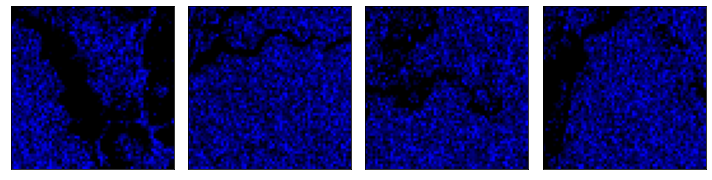

infested water
(16, 64, 64, 3)
(16, 64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


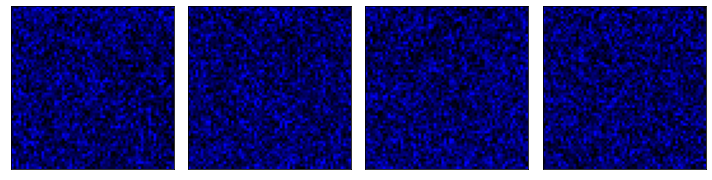

In [93]:
def plotImages( images, ls_pct=1,n_images=4,plot_title='VV, VH, VV/VH'):
   
    print(images.shape)
    from skimage import exposure

    fig, axes = plt.subplots(1, n_images, figsize=(10, 10))
    #axes = axes.flatten()
    for img, ax in zip(images, axes):
        vmin=np.percentile(img.flatten(),ls_pct)
        vmax=np.percentile(img.flatten(),100-ls_pct)
        img = exposure.rescale_intensity(img, in_range=(vmin,vmax))
        ax.imshow(img,cmap='gray',vmin=vmin,vmax=vmax)
        ax.set_xticks(())
        ax.set_yticks(())
        
    #plt.title(plot_title + '\n Linear ' + str(ls_pct) + '% Contrast Stretch'); 
    ax = plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree

    plt.tight_layout()
    plt.show()

    
    
# Plot some examples for each category    
def plot_examples_per_category():
    for i in range(nb_classes):
        print(category_names[i])
        images_to_print = images_orig[i*N_images:i*N_images+N_images]
        np.random.seed(0)
        np.random.shuffle(images_to_print)
        print(images_to_print.shape)
        plotImages(images_to_print)

plot_examples_per_category()

In [94]:
#shuffle
shuffled_indices = np.arange(nb_images)
np.random.seed(0)
np.random.shuffle(shuffled_indices)

training_indices = shuffled_indices[:int(0.7*nb_images)]               # 70% for training
val_indices = shuffled_indices[int(0.7*nb_images):int(0.8*nb_images)]  # 10% for val
test_indices = shuffled_indices[int(0.8*nb_images):]                   # 20% for test

training_images = images_orig[training_indices]
val_images = images_orig[val_indices]
test_images = images_orig[test_indices]

#transpose
training_images = np.transpose(training_images, (0, 3, 1, 2))
val_images = np.transpose(val_images, (0, 3, 1, 2))
test_images = np.transpose(test_images, (0, 3, 1, 2))

#split
training_labels = labels[training_indices]
val_labels = labels[val_indices]
test_labels = labels[test_indices]

In [95]:
test_images.shape

(7, 3, 64, 64)

In [96]:
from torch.utils.data import Dataset, TensorDataset
from torchsummary import summary

class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]

        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)

In [97]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(256, padding=4),
    transforms.Resize(255), 
    transforms.CenterCrop(224),  
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
]) 

transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


In [98]:
train_dataset = CustomTensorDataset((torch.Tensor(training_images),torch.Tensor(training_labels)),train_transforms)
val_dataset = CustomTensorDataset((torch.Tensor(val_images),torch.Tensor(val_labels)),train_transforms)
test_dataset = CustomTensorDataset((torch.Tensor(test_images),torch.Tensor(test_labels)),transform_test)

In [99]:
training_images.shape,training_labels.shape

((22, 3, 64, 64), (22, 1))

In [100]:
# Data Loader
batch_size = 10
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers)

In [101]:
import torchvision.models as models

model = models.vgg16(pretrained=False)

#model = models.resnext50_32x4d(pretrained=True)
#model.fc = nn.Linear(2048, nb_classes)

#model.cuda()

In [102]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# optimizer = optim.SGD(model.parameters(), lr=0.01)

optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=5e-4)


# Model Building¶


## Functions to Create Layer Blocks


In [109]:
from keras.layers import Conv2D, MaxPooling2D, Dense, GlobalMaxPool2D
from keras.layers import Input, Flatten, concatenate, Activation
from keras.layers import Dropout, BatchNormalization
from keras.models import Model

In [110]:
def BatchNorm_Activation_block(y, activation):
    y = BatchNormalization()(y)
    y = Activation(activation)(y)
    return y

def Convolutional_block(y, n_filters, activation, n_Conv=1, drop_rate=0, is_last=False):
    for _ in range(n_Conv):
        y = Conv2D(n_filters, 3)(y)
        if 0 < drop_rate < 1: 
            y = Dropout(drop_rate)(y)
        y = BatchNorm_Activation_block(y, activation)
    return y

def Dense_block(y, units, activation, drop_rate=.5):
    y = Dense(units)(y)
    y = BatchNorm_Activation_block(y, activation)
    if 0 < drop_rate < 1:
        y = Dropout(drop_rate)(y)
    return y

def SAF_pooling(y, drop_rate=.5):
    return Dropout(drop_rate)(MaxPooling2D(2)(y))

def get_inputs():
    radar_img_shape = all_tensors.shape[1:]
    radar_input = Input(shape=radar_img_shape, name='radar_image')
    aux_input = Input(shape=(1,), name='aux_input')
    return radar_input, aux_input

In [111]:
def build_SimpNet(act='relu', cnn_drop_rate=0, fc_drop_rate=.5):
    # inputs
    radar_input, aux_input = get_inputs()
    
    
    # SimpNet CNN architecture
    x = Convolutional_block(radar_input, 66, act, drop_rate=cnn_drop_rate)
    x = Convolutional_block(x, 128, act, n_Conv=3, drop_rate=cnn_drop_rate)
    x = Convolutional_block(x, 192, act, drop_rate=cnn_drop_rate)
    x = SAF_pooling(x)
    x = Convolutional_block(x, 192, act, n_Conv=4, drop_rate=cnn_drop_rate)
    x = Convolutional_block(x, 288, act, drop_rate=cnn_drop_rate)
    x = SAF_pooling(x)
    x = Convolutional_block(x, 288, act, drop_rate=cnn_drop_rate)
    x = Convolutional_block(x, 355, act, drop_rate=cnn_drop_rate)
    x = Convolutional_block(x, 432, act, drop_rate=cnn_drop_rate)
    radar_output = GlobalMaxPool2D()(x)
    
    # concatenate aux input
    combined = concatenate([radar_output, aux_input])
    
    # short FC layers
    x = Dense_block(combined, 1024, act, drop_rate=fc_drop_rate)
    x = Dense_block(x, 1024, act, drop_rate=fc_drop_rate)
    output = Dense(1, activation='sigmoid', name='is_iceberg')(x)
    
    # model definition and summary
    model = Model([radar_input, aux_input], output, name='SimpNet')
    model.summary()
    # plot_model(model, to_file='cnn-simpnet.png')
    
    return model

In [103]:
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Dense
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28, 1), name='block1_conv1'))
    model.add(MaxPooling2D(pool_size=(2,2), name='block1_maxpool'))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax', name='prediction'))
    
    return model
model = cnn_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               692352    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
prediction (Dense)           (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

# Augment Dataset¶


In [106]:
from keras.preprocessing.image import ImageDataGenerator

In [107]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=.1, 
    height_shift_range=.1, 
    rotation_range=45,
    zoom_range=.1,
    fill_mode='wrap'
)

In [108]:
import itertools


def take(n, iterable):
    """Return first n items of the iterable as a list"""
    return list(itertools.islice(iterable, n))


def img_and_aux_gen(datagen, tensors, aux_input, targets=None, batch_size=batch_size, shuffle=True):
    # inspired by the following Kaggle notebook
    # https://www.kaggle.com/sinkie/keras-data-augmentation-with-multiple-inputs
    assert len(tensors) == len(aux_input)
    assert len(tensors) == len(targets) if targets is not None else True
    if targets is not None:
        if shuffle:
            flat_tensors = tensors.reshape(tensors.shape[0], 75*75*3)
            aux_input_col = aux_input.reshape(aux_input.shape[0], 1)
            targets_col = targets.reshape(targets.shape[0], 1)
            Z = np.concatenate((flat_tensors, aux_input_col, targets_col), axis=1)
            np.random.shuffle(Z)
            shuffled_targets = Z[:, -1]
            shuffled_aux_inputs = Z[:, -2]
            shuffled_tensors = Z[:, :-2].reshape(tensors.shape)
            img_gen = datagen.flow(x=shuffled_tensors, y=shuffled_targets, batch_size=batch_size, shuffle=False)
            aux_gen = itertools.cycle(shuffled_aux_inputs)
        else:
            img_gen = datagen.flow(x=tensors, y=targets, batch_size=batch_size, shuffle=False)
            aux_gen = itertools.cycle(aux_input)
        while True:
            x1, y = next(img_gen)
            x2 = np.array(take(len(x1), aux_gen))
            yield ([x1, x2], y)
    else:
        gen = datagen.flow(x=tensors, y=aux_input, batch_size=1, shuffle=False)
        while True:
            x1, x2 = next(gen)
            yield ([x1, x2], )
            
def test_gen(tensors_to_test, aux_input, targets=None):
    return img_and_aux_gen(ImageDataGenerator(), tensors_to_test, aux_input, targets)

# Expand keras ImageDataGenerator functionality to handle multiple inputs¶


In [104]:
from keras import optimizers

model = cnn_model()

model.compile(optimizer=optimizers.Adam(lr=0.001, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
history = model.fit(training_images, training_labels,
                    batch_size=32,
                    epochs = 5, 
                    shuffle = True,
                    verbose=1)

Epoch 1/5


ValueError: in user code:

    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 3, 64, 64)


In [51]:
model.load_state_dict(torch.load('best_model_rs.pt'))

<All keys matched successfully>

In [20]:
gpu_on = torch.cuda.is_available()
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

In [22]:
class_total

[0.0, 0.0]

In [26]:
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

model.eval()
# iterate over test data
for data, target in test_loader:
    #data, target = data.cuda(), target.cuda()
    target = torch.tensor(target, dtype=torch.long)

    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    
    # calculate the batch loss
    loss = criterion(output, target.squeeze())
    
    # update test loss 
    test_loss += loss.item()*data.size(0)
    
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1) 
    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not gpu_on else np.squeeze(correct_tensor.cpu().numpy())
    
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            category_names[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


C:\Users\vaak\Anaconda3\envs\snappy\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


IndexError: index 7 is out of bounds for dimension 0 with size 7

In [33]:
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(images_orig, labels,random_state=1, train_size=0.75)

In [40]:
import os
gmodel=getModel()
history=gmodel.fit(X_train_cv, y_train_cv,
          batch_size=20,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 121, 121, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 58, 128)      

In [85]:


score = gmodel.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



1/1 [==============================] - 0s 63ms/step - loss: 4.3421 - accuracy: 0.1250
Test loss: 4.342134952545166
Test accuracy: 0.125


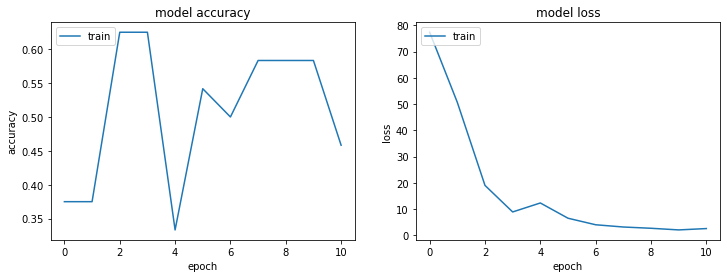

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')

# summarize history for loss
ax2.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')